# Análise da Energia/Eletricidade no Mundo e os seus impactos a nível económico e climático

Datasets encontrados:<br> <br>
1. co2-per-capita-vs-renewable-electricity
2. primary-energy-source-bar
3. SYB64_263_202110_Production Trade and Supply of Energy
4. global-electricity-per-kwh-pricing-2021
5. gdp-per-capita-worldbank
6. GDP_countries


## Perguntas a responder
● Países que consomem mais energia pouco poluente (renovável + nuclear);

● Países que consomem mais energia poluente;

● Países que consomem mais energia nuclear;

● Transição global para energia renovável;

● Países com maior transição para energia renovável;

● Países que consomem mais energia;

● Correlação entre emissão de CO2 e produção de eletricidade via fontes renováveis;

● Países que produzem mais energia;

● Países que exportam mais energia;

● Países que importam mais energia;

● Correlação entre preço da eletricidade e percentagem de eletricidade proveniente de fontes renováveis;


### Descrição dos datasets

In [530]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

#pd.options.display.float_format = '{:.0f}'.format
pd.options.display.float_format = '{:,.5f}'.format

In [531]:
# Reading and showing head data

energySourceCountry = pd.read_csv("primary-energy-source-bar.csv")
co2PerCapita = pd.read_csv("co2-per-capita-vs-renewable-electricity.csv")
productionAndSupplyEnergy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding='latin-1')
electricityPrice2021 = pd.read_excel("global-electricity-per-kwh-pricing-2021.xlsx")
GDP_perCapita = pd.read_csv("gdp-per-capita-worldbank.csv")
GDPcountries = pd.read_excel("GDP_Countries.xlsx")



#### Pergunta 1: Análise dos  Países que consumiram mais energia pouco poluente (renovável + nuclear) em 2020 e que relação existe com o seu GDP?

Análise do GDP per capita

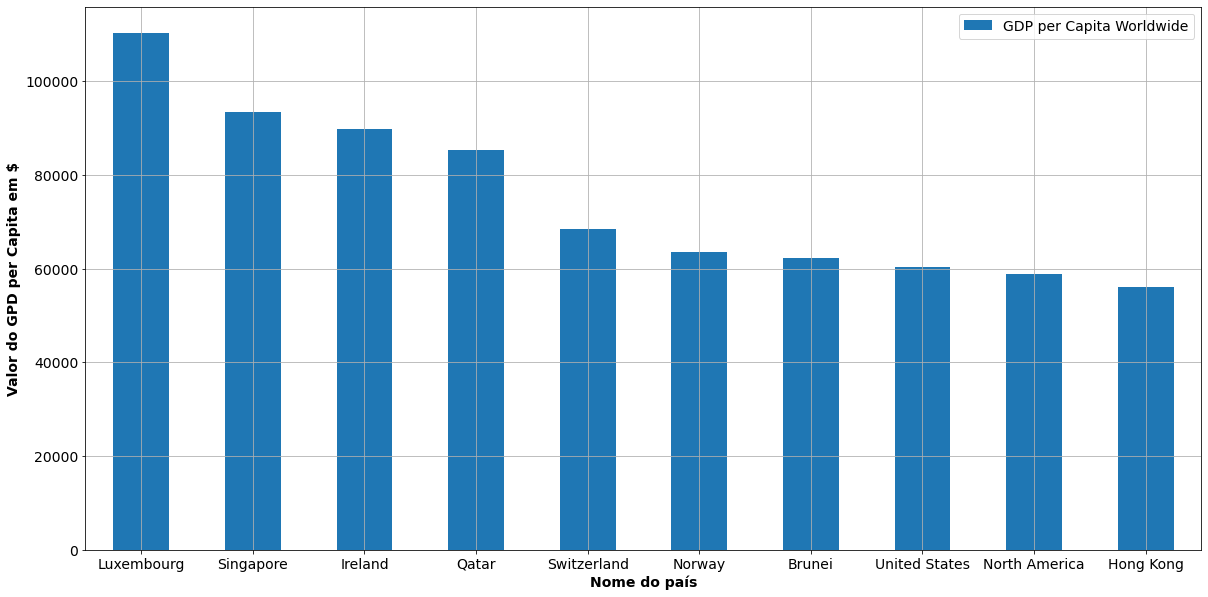

In [532]:
#Drop unwated data
GDP_perCapita = GDP_perCapita[GDP_perCapita['Year'].isin([2020])]
GDP_perCapita.rename(columns = {'GDP per capita, PPP (constant 2017 international $)':'GDP per capita'}, inplace = True)

GDP_perCapitaPlot = GDP_perCapita
GDP_perCapitaPlot = GDP_perCapitaPlot.sort_values(by=['GDP per capita'],ascending=False).iloc[:10]
GDP_perCapitaPlot.plot.bar(x='Entity', y='GDP per capita', rot=0, grid=True, figsize=(20,10))
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Valor do GPD per Capita em $', fontweight='bold')
plt.legend(['GDP per Capita Worldwide'])
plt.show()

Análise do GDP de cada país

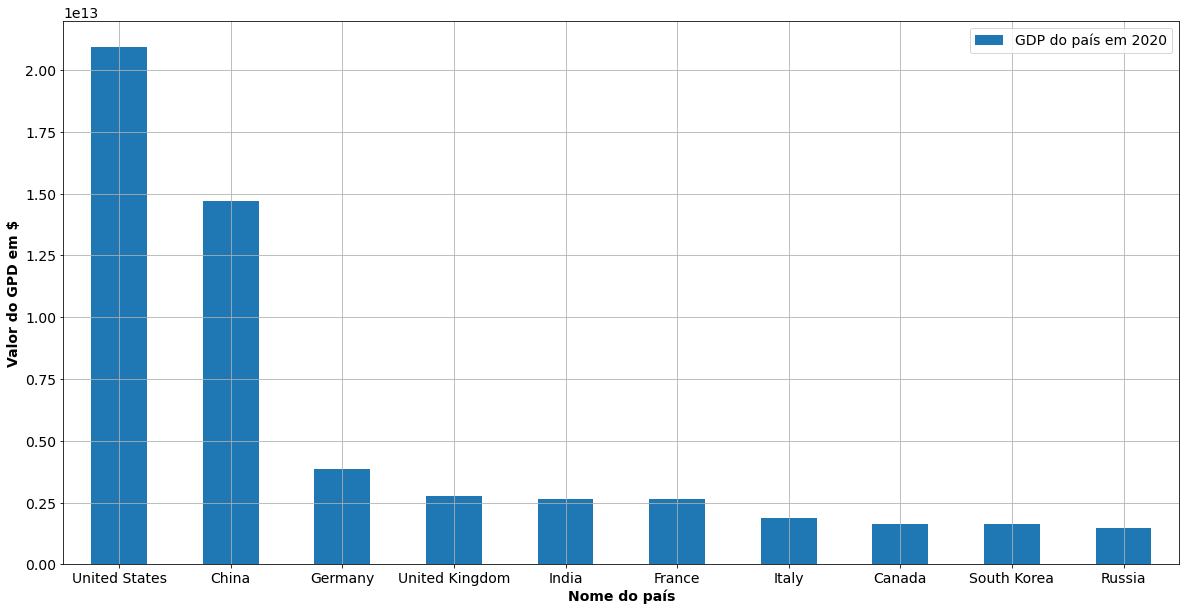

,Code,Country GDP 2020,Entity
0,AFG,"20,116,137,325.82060",Afghanistan
1,AGO,"58,375,976,292.96780",Angola
2,ALB,"14,887,629,268.29270",Albania
3,ARG,"389,288,056,265.32501",Argentina
4,ARM,"12,641,209,802.11200",Armenia
...,...,...,...
172,VUT,"881,547,928.58381",Vanuatu
173,WSM,"807,100,820.64813",Samoa
174,ZAF,"335,442,101,366.41699",South Africa
175,ZMB,"18,110,631,358.31140",Zambia


In [533]:
yearList = list(range(1960,2020))
yearList.append(2021)

GDPcountries1 = GDPcountries
GDPcountries1.drop(yearList, axis = 1, inplace = True, errors='ignore')
GDPcountries1.drop(['Indicator Code', 'Indicator Name'], axis = 1, inplace = True)
GDPcountries1.rename(columns = {2020:'Country GDP 2020'}, inplace = True)

GDPcountries1 = GDPcountries1.merge(GDP_perCapita[['Code','Entity']])

GDPcountriesPlot = GDPcountries1
GDPcountriesPlot = GDPcountriesPlot.sort_values(by=['Country GDP 2020'],ascending=False).iloc[:10]
GDPcountriesPlot.plot.bar(x='Entity', y='Country GDP 2020', rot=0, grid=True, figsize=(20,10))
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Valor do GPD em $', fontweight='bold')
plt.legend(['GDP do país em 2020'])
plt.show()

GDPcountries1

Vamos agregar a tabela GDP_perCapita e GDPcountries de forma a conter os dois atributos para que possam ser comparados

In [534]:
#Merge GDP_perCapita with GDPcountries based on commom columns
GDP_perCapita_GDPcountries = pd.merge(GDP_perCapita, GDPcountries, 
                   on='Code', 
                   how='outer')
GDP_perCapita_GDPcountries = GDP_perCapita_GDPcountries.sort_values(by=['Country GDP 2020'],ascending=False)
GDP_perCapita_GDPcountries = GDP_perCapita_GDPcountries.loc[GDP_perCapita_GDPcountries['Country GDP 2020'].notna() & GDP_perCapita_GDPcountries['Entity'].notna()]

GDP_perCapita_GDPcountries
#newDataset.loc[newDataset['Code'] == 'USA']

,Entity,Code,Year,GDP per capita,Country GDP 2020
216,United States,USA,"2,020.00000","60,235.72849","20,953,030,000,000.00000"
79,China,CHN,"2,020.00000","16,410.79780","14,722,730,697,890.09961"
106,Germany,DEU,"2,020.00000","50,922.35802","3,846,413,928,653.70996"
215,United Kingdom,GBR,"2,020.00000","41,627.12927","2,759,804,061,837.06982"
119,India,IND,"2,020.00000","6,118.35733","2,660,245,248,867.62988"
...,...,...,...,...,...
183,Samoa,WSM,"2,020.00000","6,295.73184","807,100,820.64813"
91,Dominica,DMA,"2,020.00000","9,891.29194","504,214,814.81481"
184,Sao Tome and Principe,STP,"2,020.00000","4,051.60484","472,914,469.91933"
130,Kiribati,KIR,"2,020.00000","2,291.90722","197,508,774.34451"


Criação da tabela countryEnergy àqual se vai inserir uma nova coluna (renewable_nuclear) que irá conter a soma do consumo da energia: Nuclear + Hídrica + Eólica + Solar + Biomassa.

De seguida, ordenamos a tabela pela coluna que acabámos de criar de forma descendente e ficamos com os países cujo Code não seja NULL e cujo ano seja 2020 e fazemos um gráfico de barras com o TOP 5 de maiores consumidores.

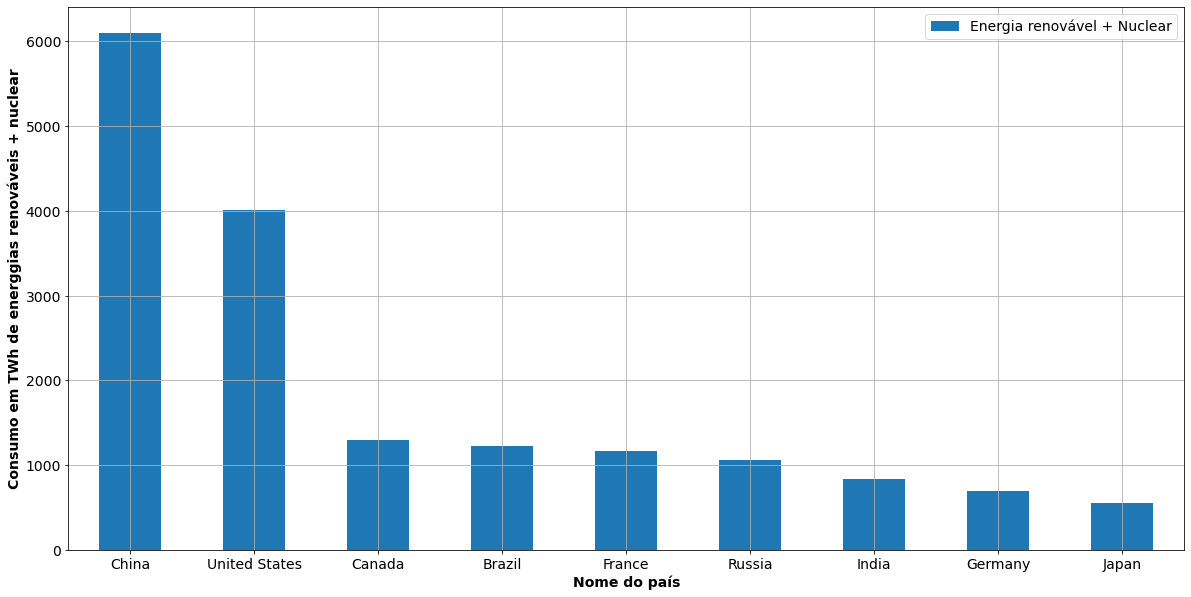

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh,renewable_nuclear
5002,World,OWID_WRL,2020,"42,062.40803","48,259.27114","38,227.77333","6,661.47737","10,600.72704","3,925.71497","2,111.17565",700.06865,"23,999.16368"
905,China,CHN,2020,"22,852.90616","7,916.45544","3,305.79976",903.45941,"3,261.55535","1,150.91156",644.16508,135.52420,"6,095.61561"
4742,United States,USA,2020,"2,556.32690","9,038.97415","8,320.19446","2,051.39389",712.19936,841.08816,330.52183,76.82546,"4,012.02870"
737,Canada,CAN,2020,137.56848,"1,183.49924","1,126.35109",240.61396,949.03190,89.06914,10.91534,10.69489,"1,300.32523"
569,Brazil,BRA,2020,160.82452,"1,279.66394",321.18170,37.73656,978.94959,140.65944,19.63504,55.36807,"1,232.34870"
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,Kuwait,KWT,2020,0.35881,211.37302,206.45203,0.00000,0.00000,0.04322,0.37800,0.00000,0.42123
3575,Qatar,QAT,2020,0.00000,125.37910,349.81944,0.00000,0.00000,0.00000,0.02064,0.11484,0.13548
1756,Hong Kong,HKG,2020,38.23056,170.09183,49.44259,0.00000,0.00000,0.00204,0.00277,0.12014,0.12495
4538,Turkmenistan,TKM,2020,0.00000,76.82636,313.00000,0.00000,0.00778,0.00000,0.01717,0.00000,0.02494


In [535]:
countryEnergy = energySourceCountry
countryEnergy['renewable_nuclear'] = countryEnergy['Nuclear Consumption - TWh'] + countryEnergy['Hydro Consumption - TWh'] + countryEnergy['Wind Consumption - TWh'] + countryEnergy['Solar Consumption - TWh'] + countryEnergy['Geo Biomass Other - TWh']

countryEnergy = countryEnergy.sort_values(by=['renewable_nuclear'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] == 2020

countryEnergy = countryEnergy.loc[(cond1) & (cond2)]
countryEnergyPlot = countryEnergy.iloc[1:10]
countryEnergyPlot.plot.bar(x='Entity', y='renewable_nuclear', rot=0, grid=True, figsize=(20,10))
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energgias renováveis + nuclear', fontweight='bold')
plt.legend(['Energia renovável + Nuclear'])
plt.show()
countryEnergy


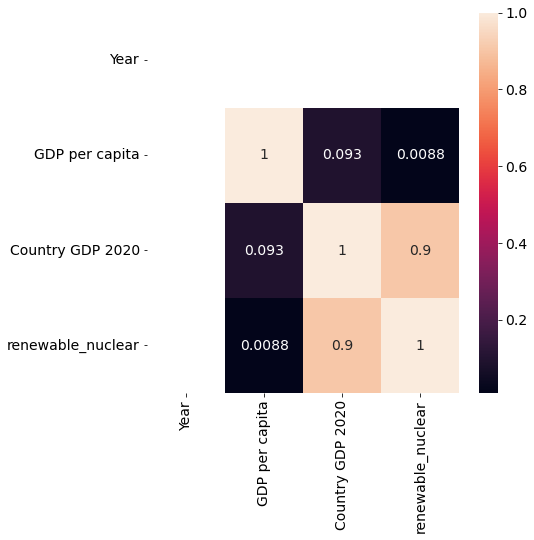

"correlationDataset = pd.merge(newDataset, countryEnergy, \n                   on=['Code', 'Year', 'Entity'], \n                   how='outer')\ncorrelationDataset\n"

In [536]:
countryGDP_renewableEnergy= GDP_perCapita_GDPcountries.merge(countryEnergy[['Code','renewable_nuclear']])
correlation = countryGDP_renewableEnergy.corr()

fig = plt.figure(figsize=(7, 7))
plt.rcParams['font.size'] = '14'
sns.heatmap(correlation, annot=True)
plt.show()

"""correlationDataset = pd.merge(newDataset, countryEnergy, 
                   on=['Code', 'Year', 'Entity'], 
                   how='outer')
correlationDataset
"""

#### Pergunta 2: Países que consomem mais energia poluente;

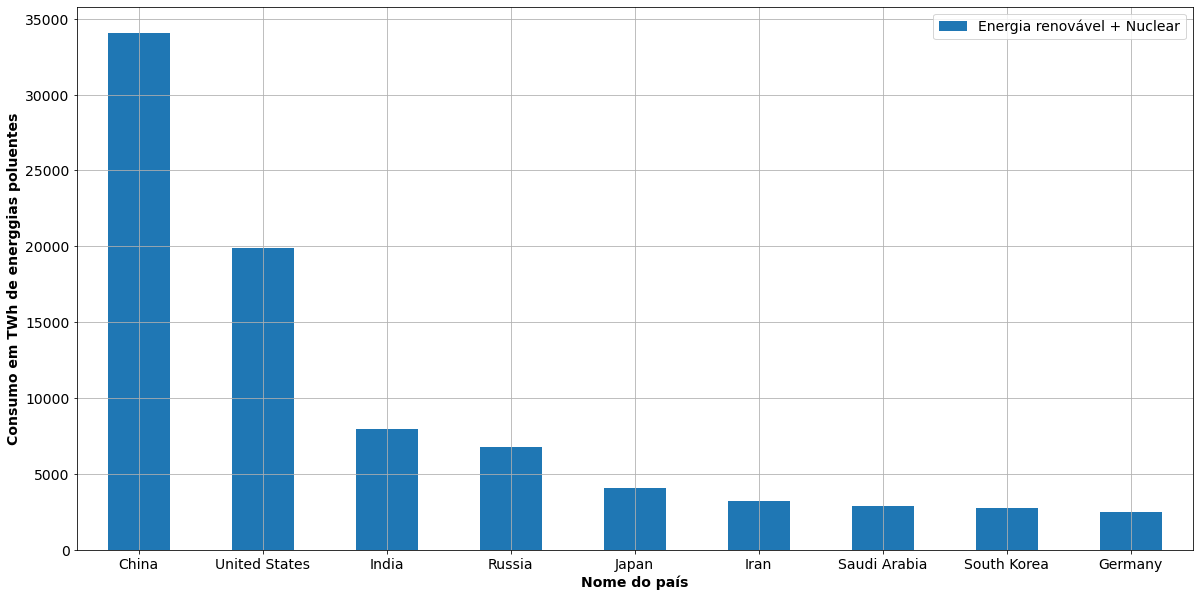

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh,renewable_nuclear
5002,World,OWID_WRL,2020,"42,062.40803","48,259.27114","38,227.77333","6,661.47737","10,600.72704","3,925.71497","2,111.17565",700.06865,"23,999.16368"
905,China,CHN,2020,"22,852.90616","7,916.45544","3,305.79976",903.45941,"3,261.55535","1,150.91156",644.16508,135.52420,"6,095.61561"
4742,United States,USA,2020,"2,556.32690","9,038.97415","8,320.19446","2,051.39389",712.19936,841.08816,330.52183,76.82546,"4,012.02870"
737,Canada,CAN,2020,137.56848,"1,183.49924","1,126.35109",240.61396,949.03190,89.06914,10.91534,10.69489,"1,300.32523"
569,Brazil,BRA,2020,160.82452,"1,279.66394",321.18170,37.73656,978.94959,140.65944,19.63504,55.36807,"1,232.34870"
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,Kuwait,KWT,2020,0.35881,211.37302,206.45203,0.00000,0.00000,0.04322,0.37800,0.00000,0.42123
3575,Qatar,QAT,2020,0.00000,125.37910,349.81944,0.00000,0.00000,0.00000,0.02064,0.11484,0.13548
1756,Hong Kong,HKG,2020,38.23056,170.09183,49.44259,0.00000,0.00000,0.00204,0.00277,0.12014,0.12495
4538,Turkmenistan,TKM,2020,0.00000,76.82636,313.00000,0.00000,0.00778,0.00000,0.01717,0.00000,0.02494


In [537]:
countryPoluentEnergy = energySourceCountry
countryPoluentEnergy['PoluentEnergy'] = countryPoluentEnergy['Coal Consumption - TWh'] + countryPoluentEnergy['Oil Consumption - TWh'] + countryPoluentEnergy['Gas Consumption - TWh']

countryPoluentEnergy = countryPoluentEnergy.sort_values(by=['PoluentEnergy'],ascending=False)

cond1 = countryPoluentEnergy['Code'].notna()
cond2 = countryPoluentEnergy['Year'] == 2020

countryPoluentEnergy = countryPoluentEnergy.loc[(cond1) & (cond2)]
countryPoluentEnergyPlot = countryPoluentEnergy.iloc[1:10]
countryPoluentEnergyPlot.plot.bar(x='Entity', y='PoluentEnergy', rot=0, grid=True, figsize=(20,10))
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energgias poluentes', fontweight='bold')
plt.legend(['Energia renovável + Nuclear'])
plt.show()
countryEnergy

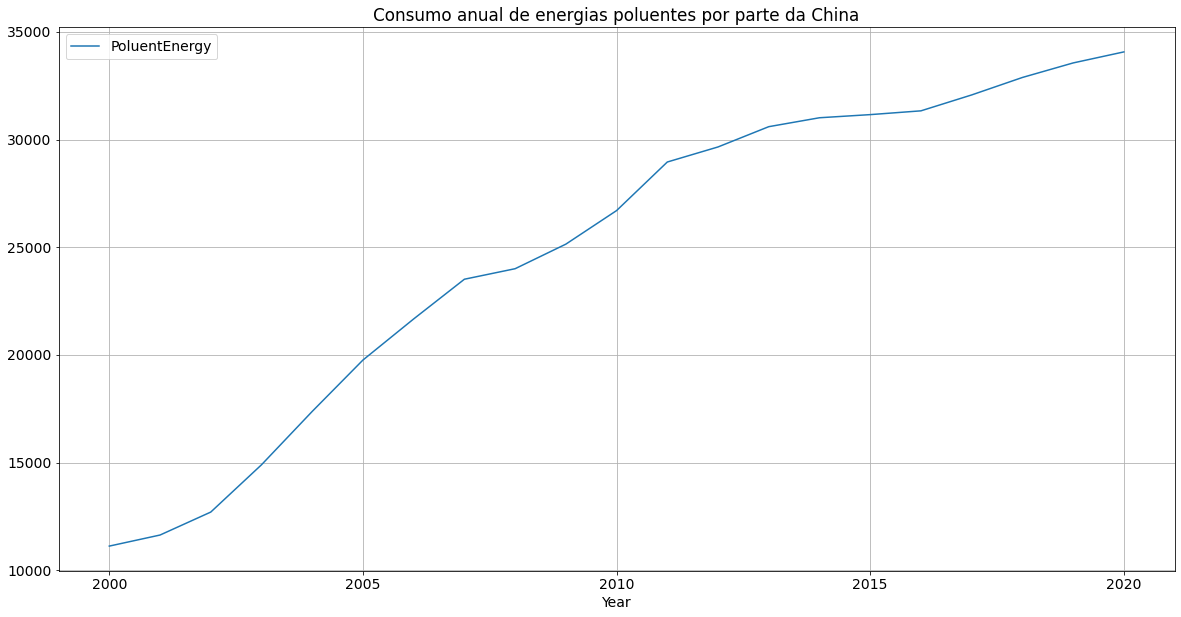

,Entity,Code,Year,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh,Nuclear Consumption - TWh,Hydro Consumption - TWh,Wind Consumption - TWh,Solar Consumption - TWh,Geo Biomass Other - TWh,renewable_nuclear,PoluentEnergy
885,China,CHN,2000,"8,211.40621","2,661.13700",246.95747,46.49167,617.80556,1.63861,0.06111,2.53700,668.53394,"11,119.50068"
886,China,CHN,2001,"8,635.75475","2,720.86759",276.45772,48.21818,765.63474,1.98478,0.08555,2.55400,818.47726,"11,633.08006"
887,China,CHN,2002,"9,467.45754","2,938.00831",294.13569,68.89661,789.59516,2.29602,0.13161,2.54600,863.46541,"12,699.60154"
888,China,CHN,2003,"11,283.05858","3,271.52446",341.74730,118.07917,772.84615,2.71610,0.17436,2.53600,896.35178,"14,896.33033"
889,China,CHN,2004,"13,155.27970","3,820.07197",399.83970,136.61990,957.04586,3.45895,0.20573,2.52800,"1,099.85845","17,375.19137"
890,China,CHN,2005,"15,405.10574","3,886.77454",469.75108,142.80000,"1,067.92547",5.23466,0.22595,5.32200,"1,221.50808","19,761.63137"
891,China,CHN,2006,"16,918.38174","4,174.97446",577.83757,146.59292,"1,164.83679",9.92153,0.25393,7.13300,"1,328.73817","21,671.19377"
892,China,CHN,2007,"18,423.91294","4,381.04255",710.77899,165.03281,"1,288.98250",14.55437,0.30281,9.86300,"1,478.73550","23,515.73447"
893,China,CHN,2008,"18,715.92062","4,469.13024",819.32906,180.54317,"1,681.41615",34.58075,0.40124,14.86600,"1,911.80730","24,004.37993"
894,China,CHN,2009,"19,605.60127","4,637.32009",902.24030,183.77415,"1,615.11543",72.44675,0.73194,20.85932,"1,892.92760","25,145.16166"


In [538]:
chinaDataset = energySourceCountry.loc[(energySourceCountry['Code'] == 'CHN') & (energySourceCountry['Year'] > 1999)]


ax = chinaDataset[['Year','PoluentEnergy']].groupby(['Year']).sum().plot(rot=0, grid=True, figsize=(20,10))
ax.locator_params(integer=True)
plt.title('Consumo anual de energias poluentes por parte da China')
plt.show()
chinaDataset

In [539]:
co2PerCapita

,Entity,Code,Year,Annual CO2 emissions (per capita),Renewables (% electricity),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1949,0.00190,NaN,NaN
2,Afghanistan,AFG,1950,0.01090,NaN,NaN
3,Afghanistan,AFG,1951,0.01170,NaN,NaN
4,Afghanistan,AFG,1952,0.01150,NaN,NaN
...,...,...,...,...,...,...
24665,Zimbabwe,ZWE,2017,0.67300,58.27600,NaN
24666,Zimbabwe,ZWE,2018,0.82100,59.14600,NaN
24667,Zimbabwe,ZWE,2019,0.74760,67.63900,NaN
24668,Zimbabwe,ZWE,2020,0.70860,67.63900,NaN


In [540]:
productionAndSupplyEnergy

,ID,Country/Region,Year,Series,Value
0,1,"Total, all countries or areas",1995,Primary energy production (petajoules),"3,82,594"
1,1,"Total, all countries or areas",2000,Primary energy production (petajoules),"4,13,334"
2,1,"Total, all countries or areas",2005,Primary energy production (petajoules),"4,77,637"
3,1,"Total, all countries or areas",2010,Primary energy production (petajoules),"5,31,540"
4,1,"Total, all countries or areas",2015,Primary energy production (petajoules),"5,70,407"
...,...,...,...,...,...
8405,716,Zimbabwe,2010,Supply per capita (gigajoules),31
8406,716,Zimbabwe,2015,Supply per capita (gigajoules),34
8407,716,Zimbabwe,2016,Supply per capita (gigajoules),33
8408,716,Zimbabwe,2017,Supply per capita (gigajoules),33


In [541]:
electricityPrice2021

,Rank,Country code,Country name,Continental region,Tariffs measured,Average price of 1KW/h (local currency),Currency,Conversion rate (USD),Average price of 1KW/h (USD),Cheapest 1KW/h (Local currency),Cheapest KW/h (USD),Most expensive KW/h (Local currency),Most expensive KW/h (USD),Sample date,Global Totals (2021),Unnamed: 15
0,1.00000,LY,Libya,NORTHERN AFRICA,3.00000,0.03000,LYD,0.21668,0.00650,0.02000,0.00433,0.05000,0.01083,2021-07-02,Total number of countries,230.00000
1,2.00000,AO,Angola,SUB-SAHARAN AFRICA,4.00000,7.30740,AOA,0.00174,0.01271,2.80440,0.00488,16.80360,0.02923,2021-05-13,Most expensive average price per KWh,0.69192
2,3.00000,SD,Sudan,SUB-SAHARAN AFRICA,1.00000,6.35000,SDG,0.00228,0.01450,6.35000,0.01450,6.35000,0.01450,2021-09-08,Cheapest average price per KWh,0.00650
3,4.00000,KG,Kyrgyzstan,CIS (FORMER USSR),16.00000,1.46500,KGS,0.01179,0.01728,0.77000,0.00908,2.16000,0.02547,2021-06-23,Average price per KWh (Global),0.16495
4,5.00000,ZW,Zimbabwe,SUB-SAHARAN AFRICA,6.00000,7.44000,ZWL,0.00276,0.02056,2.12000,0.00586,12.74000,0.03520,2021-10-25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226.00000,FM,Micronesia (Federated States of),OCEANIA,16.00000,0.48406,USD,1.00000,0.48406,0.37120,0.37120,1.09490,1.09490,2021-07-05,NaN,NaN
226,227.00000,CK,Cook Islands,OCEANIA,3.00000,0.77000,NZD,0.67970,0.52337,0.53000,0.36024,0.79000,0.53696,2021-09-16,NaN,NaN
227,228.00000,VU,Vanuatu,OCEANIA,3.00000,67.05000,VUV,0.00882,0.59145,18.84000,0.16619,166.23000,1.46631,2021-10-15,NaN,NaN
228,229.00000,SH,Saint Helena,SUB-SAHARAN AFRICA,3.00000,0.46000,SHP,1.33000,0.61180,0.30000,0.39900,0.46000,0.61180,2021-08-23,NaN,NaN
